
# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Datasets Description :
#### The data is aquired from  2 data sets:
### First : Gun data:  
>The data comes from the FBI's National Instant Criminal Background Check System (NICS).It describes the number of checks that has been done on the NICS system, categorized by the columns as follows: number of **permits** the buyers have,the type of gun
being purchased eg:long gun,handgun,etc.. which is divided also by the type of sale eg. private,redemption,rentals,etc..  
Each row has a value for **month:** time of the check by month ranging from years from 1998 to 2017 & **state** where it occurs & finally the **total** number of checks done across the row which includes sum of all other categeries combined.  
We are going to focus mainly on these columns for our analysis:month,permits,total,state.
### Second : Census data:  
>The data comes from census.gov where it explains population census mainly for 2 years 2010 & 2016 for each state.  
It is categorized by the facts column (total of 64 categories) where the facts include eg:  
_percentages_ for gedner,ethnicity,education,age,etc..  
also _Value_ for: income,properties owned and their type,etc..


### Questions for Analysis
>### Research Question 1 : "What census data is most associated with high gun per capita?"
>### Research Question 2 : "What is the comparison between gun purchases & permits across states?"
>### Research Question 3 : "Is there a trend for gun purchases over time?"

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.dates as mdates
%matplotlib inline
#plot style for matplotlib plots :
plt.style.use('seaborn-whitegrid')
#setting options to view the dataframe :
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 100)
#setting option to view the floats with only 4 decimal points
pd.set_option('display.float_format', '{:.4f}'.format)
#setting to turn off SettingWithCopy warning:
pd.set_option('mode.chained_assignment', None)


<a id='wrangling'></a>
# Data Wrangling


## 1st : Census data wrangling & Cleaning


In [2]:
#loading the Census data into a dataframe
df_c_main=pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')

In [3]:
#this code was used to initially explore the data and get the below obeservations:
##df_c_main.shape
##df_c_main.tail(30)
df_c_main.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


# Observations for initial cleaning of Census data
1.drop fact notes column  
2.there is some notes at the bottom starting from index 64,no useful data or values for anlaysis.  
They need to be deleted so  data frame contains only fact data.  
3.making the table similar to the gun data for future merges

In [4]:
# drop fact note column
df_c_main.drop('Fact Note',axis=1,inplace=True)
#dropping notes in the bottom,,starting from index 64 so data frame contains only fact data
df_c_main=df_c_main.iloc[:64,:]

In [5]:
#making the data consistent and similar to the gun data.
#first making states as rows in a sperate column
df_c=df_c_main.T.reset_index()
#adjusting the index
df_c.columns=df_c.iloc[0]
df_c.drop(labels=0,inplace=True)
df_c.rename(columns={'Fact':'state'},inplace=True)

we have a census data frame **df_c** that is initially cleaned with values and correct index.  
now let's explore it and check for any missing values and date types

In [6]:
#this code was used to get the below obeservations:
##df_c
##df_c.info()

## Observations & final cleaning of  census data

1.there are no null values,but some values are missing numbers eg :'z' or 'D'  
2.data types must be changed from __object__ to __float__ to do statsical analysis  
but some object string values contain non numeric charachters eg:',' or '%' so we need to delete those to change the data type correctly  
3.afterwards we need to deal with the missing values after converting all valid values to numbers  
4.from **row index 31 to 42** every column that has percentage values is inconsistent with the rest (divided by 100 eg. : 0.2 instead of 20%),this needs to be fixed so all data is consistent

In [7]:
#observation 2:
#note that operations always exclude state column
#remove any characters and keep numerical data
df_c.iloc[:,1:].replace(to_replace=[',','%','\$'],value=['','',''],regex=True,inplace=True)
#iterating through the data frame columns to apply to_numeric,changing all strings values to floats or integers
col_index=df_c.iloc[:,1:].columns.values
for i in col_index:
 df_c[i]=pd.to_numeric(df_c[i],errors='coerce')
#observation 3:
 #there are some missing values,which is best replaced by the mean of the whole column
 df_c[i]=df_c[i].fillna(df_c[i].mean())

In [8]:
#observation 4:
#taking away the data required to change to percent in seperate dataframe "df_c_perc"
#extracting all column names that contains percent,to change them all,and rows from 31 to 42
columns_index=df_c.columns.values[pd.Series(df_c.columns.values).str.contains('percent')]
df_c_perc=df_c.iloc[30:42,:].loc[:,columns_index]*100
#inserting the correct values back to original data frame "df_c"
df_c.iloc[30:42,:].loc[:,columns_index]=df_c_perc

Now the Clean census data frame **df_c** is ready


## 2nd : Gun data wrangling & cleaning


In [9]:
#loading the NICS gun data into a dataframe 
df_g_main=pd.read_excel('Database_Ncis_and_Census_data/gun_data.xlsx')


In [10]:
#the below code is used to explore the data frame and get cleaning observations:
#df_g_main.info()
df_g_main.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0000,0.0000,5734.0000,6320.0000,221.0000,317,0.0000,15.0000,21.0000,2.0000,1378.0000,1262.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,16.0000,3.0000,0.0000,0.0000,3.0000,32019
1,2017-09,Alaska,209.0000,2.0000,2320.0000,2930.0000,219.0000,160,0.0000,5.0000,2.0000,0.0000,200.0000,154.0000,2.0000,28.0000,30.0000,0.0000,0.0000,0.0000,17.0000,24.0000,1.0000,0.0000,0.0000,0.0000,6303


checking the states column in both gun data & census date to compare in  
as eventually we will be merging the 2 dataframes on the state index

In [11]:
#compare the number of states in census data
st_c=df_c['state'].unique()
print('unique number of states in df_c ={}'.format(st_c.shape[0]),'\n')
st_c

unique number of states in df_c =50 



array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
st_g=df_g_main['state'].unique()
print('unique number of states in df_g ={}'.format(st_g.shape[0]),'\n')
st_g

unique number of states in df_g =55 



array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

we can conclude from the above lists that 5 differences are :  
'District of Columbia' , 'Guam','Mariana Islands','Puerto Rico','Virgin Islands'  
which are not from the 50 states

# Observations & required cleaning of gun data
1.there are a lot of null values which we can fill with zeroes   
2.we need to drop the different states  
3.change date type of the month column to datetime

In [13]:
#observation 1:
df_g=df_g_main.fillna(0)
#observation 2:
#drop the different states
st_d=['District of Columbia' , 'Guam','Mariana Islands','Puerto Rico','Virgin Islands']
df_g=df_g[~df_g['state'].isin(st_d)]



In [14]:
#observation 3:
#change date type of the month column to datetime
df_g['month']=pd.to_datetime(df_g['month'],errors='raise')

we have a clean gun data dataframe **df_g**
checking for missing values or duplicates

In [15]:
#df_g.info() 
df_g.duplicated().sum()

0

**df_g** is ready, no missing values or dupliacates, & matches the 50 states in census data.   
according to our analysis questions we can use and snip parts of it as needed 
or merge it with census dataframe **df_c**

<a id='eda'></a>
# Exploratory Data Analysis

### Research Question 1 (What census data is most associated with high gun per capita?)
We are going to explore this question for the 2 years 2010 & 2016, due to that the census data contains populations estimates for only those 2 years.  
From exploring the gun data, we can see that it calculates total gun checks each month for a lot of differenet years by state,
so we are going to get the totals by state for the 2 years and creating 2 seperate columns for totals,
then merge it with the census data to get the gun per captia for 2010 & 2016

The columns needed are just **month**,**state**,**totals**

In [16]:
df_g_1=df_g[['month','state','totals',]]
#creating a new column for years
df_g_1['year']=df_g_1['month'].dt.year

In [17]:

#filter by year 2010
df_g_10=df_g_1.query('year==2010')
#get the totals for gun checks for each state,then rename columns to add years
df_g_10=pd.DataFrame(df_g_10.groupby('state')['totals'].sum().reset_index())
df_g_10.rename(columns={'totals':'total 2010'},inplace=True)

In [18]:
# same as above for year 2016
df_g_16=df_g_1.query('year==2016')
df_g_16=pd.DataFrame(df_g_16.groupby('state')['totals'].sum().reset_index())
df_g_16.rename(columns={'totals':'total 2016'},inplace=True)


In [19]:
#merging the 2 data sets df_g_10 & df_g_16,to create totals dataframe df_g_t
df_g_t=df_g_10.merge(df_g_16,on='state',how='inner')

Merge all the data cleaned from both data to **df_gpcaptia**


In [20]:
#merge on census data frame we cleaned before "df_c"
df_gpcaptia=pd.merge(df_c,df_g_t,on='state',how='inner')

## Now  we neeed to get the gun per captia
### important to note:
" We are going to assume that each gun purchased must have a check on NICS done first,  
although in reality that is not the case , but the total gun checks variable directly has a postive effect 
on the total gun purchases variable "

As mentioned before,we have the populations estiamtes for the 50 states only for the 2 years :2010 & 2016  
& we already added the total gun checks for those 2 years,for the 50 states in **df_gpcaptia**.   
so to get guns per captia simply divide the total checks *per year* on Population estimates  

In [21]:
##get gun per captia for 2 years 2010 & 2016
df_gpcaptia['gun per captia 2010']=df_gpcaptia['total 2010']/df_gpcaptia['Population estimates base, April 1, 2010,  (V2016)']
df_gpcaptia['gun per captia 2016']=df_gpcaptia['total 2016']/df_gpcaptia['Population estimates, July 1, 2016,  (V2016)']

In [22]:
#codes used to explore the new dataframe 
#df_gpcaptia.head()
#df_gpcaptia.shape
df_gpcaptia.describe()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",total 2010,total 2016,gun per captia 2010,gun per captia 2016
count,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000
mean,6448926.8600,6163126.7800,3.1207,6162876.3000,4.6968,5.0214,17.4258,18.3380,11.8104,9.9894,38.5117,38.5662,60.3970,8.3609,1.1803,3.6312,0.3917,2.3104,8.8747,52.7791,401594.0000,7.0770,2707684

### Choosing the variable for comparison : gun per captia year 2016
looking at the census data facts,most data were gathered after 2010 *"either 2016 or 2011-2015"*  
so we are going to check the association using only **gun per captia 2016** data values.  
Just to get comparison of the variable,we are also going to plot a visulation between the 2 years for 50 states


## First let's plot a bar graph for gun per captia for each state
to get an idea of the gun per captia variable and which states have the highest numbers of gun checks -or purchases- for both years

### Gun per captia 2010

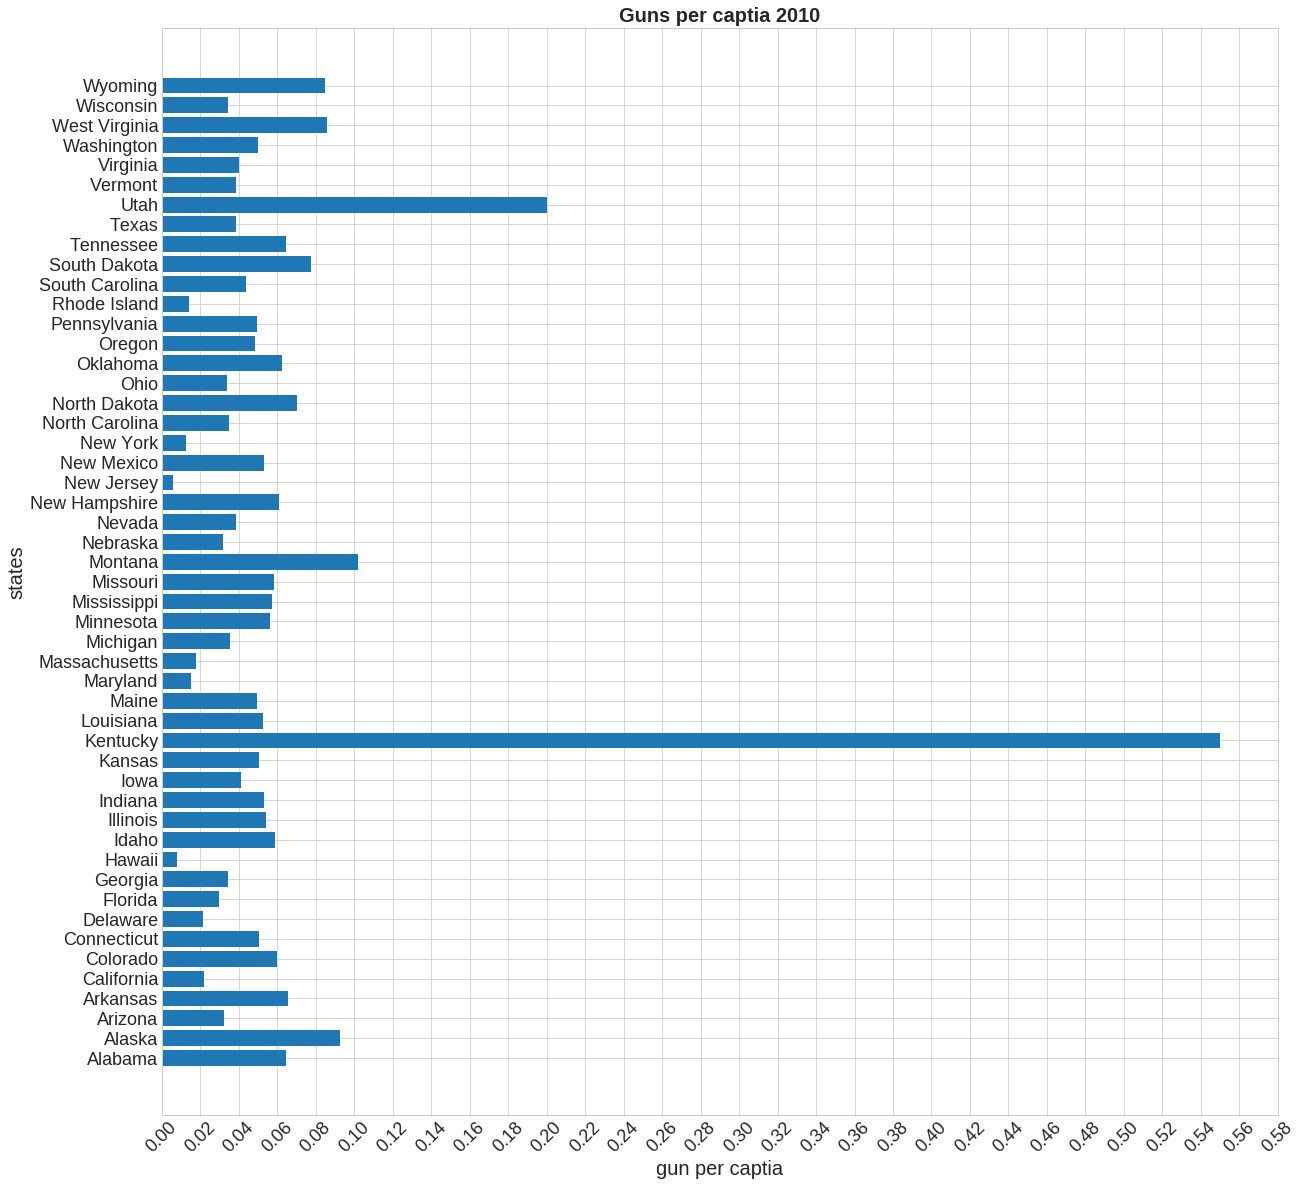

In [23]:
x_10=df_gpcaptia['gun per captia 2010']
y_10=df_gpcaptia['state']
plt.figure(figsize = (20,20))
plt.barh(y_10,x_10)
plt.title('Guns per captia 2010',fontsize=20,fontweight="bold")
plt.xlabel('gun per captia',fontsize=20)
plt.ylabel('states',fontsize=20)
plt.tick_params('both',labelsize=18)
plt.xticks(np.arange(0, 0.6,0.02),rotation=45);

In [24]:
gcaptia_2010_h=df_gpcaptia['gun per captia 2010'].nlargest(5).reset_index(drop=True)
gcaptia_2010_hstate=df_gpcaptia[df_gpcaptia['gun per captia 2010'].isin(df_gpcaptia['gun per captia 2010'].nlargest(5))].sort_values('gun per captia 2010',ascending=False)['state'].reset_index(drop=True)
print('Highest 5 states with gun per captia for year 2010 \n')
for i in range(0,5):
      print(str(i+1)+'.{}: {}'.format(gcaptia_2010_hstate[i],round(gcaptia_2010_h[i],2)))

Highest 5 states with gun per captia for year 2010 

1.Kentucky: 0.55
2.Utah: 0.2
3.Montana: 0.1
4.Alaska: 0.09
5.West Virginia: 0.09


### Gun per captia 2016

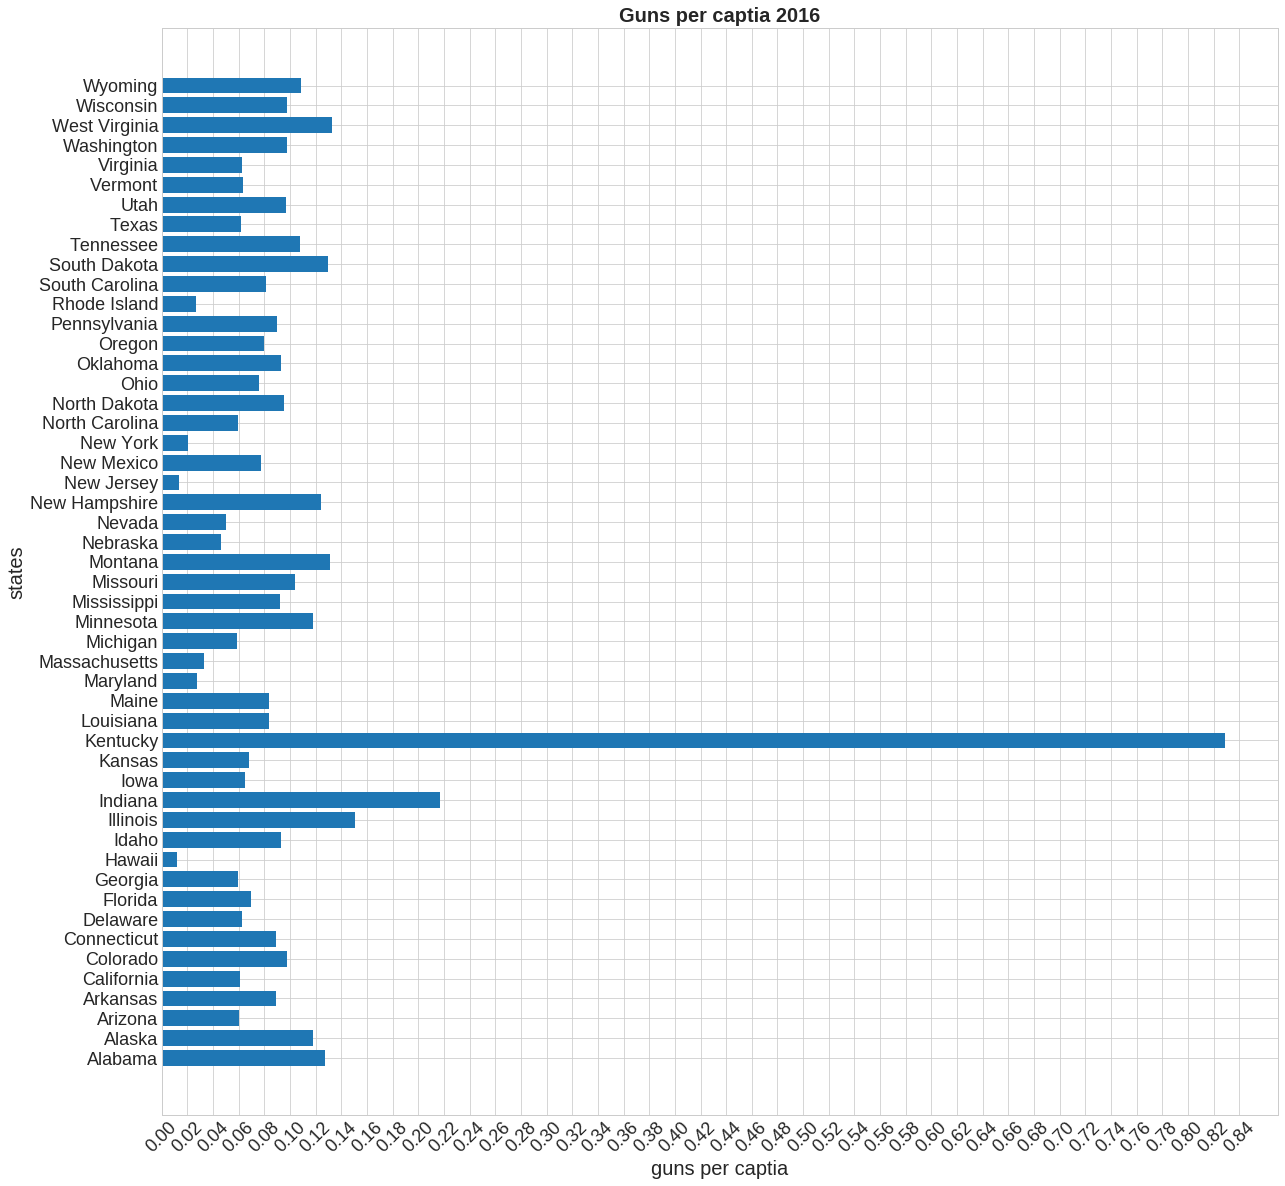

In [25]:
x_16=df_gpcaptia['gun per captia 2016']
y_16=df_gpcaptia['state']
plt.figure(figsize = (20,20))
plt.barh(y_16,x_16)
plt.title('Guns per captia 2016',fontsize=20,fontweight="bold")
plt.xlabel('guns per captia',fontsize=20)
plt.ylabel('states',fontsize=20)
plt.tick_params('both',labelsize=18)
plt.xticks(np.arange(0, 0.85,0.02),rotation=45);

In [26]:
gcaptia_2016_h=df_gpcaptia['gun per captia 2016'].nlargest(5).reset_index(drop=True)
gcaptia_2016_hstate=df_gpcaptia[df_gpcaptia['gun per captia 2016'].isin(df_gpcaptia['gun per captia 2016'].nlargest(5))].sort_values('gun per captia 2016',ascending=False)['state'].reset_index(drop=True)
print('Highest 5 states with gun per captia for year 2016 \n')
for i in range(0,5):
      print(str(i+1)+'.{}: {}'.format(gcaptia_2016_hstate[i],round(gcaptia_2016_h[i],2)))

Highest 5 states with gun per captia for year 2016 

1.Kentucky: 0.83
2.Indiana: 0.22
3.Illinois: 0.15
4.West Virginia: 0.13
5.Montana: 0.13


### correlation coefficent  
Since we have 69 columns in this dataframe,64 of which are fact census data that we want to analyze for the association with 
the gun per captia variable    
it will be inefficient to start by using plots & visualizations and looking at the shapes manually.  
So we can use **Pearson's Correlation Coefficient** to answer the question,then plot the highest results for a better visualizations  
[refrence Link:correlation coefficent](https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall)

In [27]:
#to compute a dataframe with Pearson's Correlation between all columns
df_corr_gpcaptia=df_gpcaptia.corr(method='pearson')


then we can extract the **15 largest (positive Correlation) & 15 smallest (negative Correlation) Coefficient values**

In [28]:
# this column from the data frame will show the desired values,which are all correlation coefficients for gun per captia 2016
corr_16=df_corr_gpcaptia['gun per captia 2016']
display('15 highest positive Correlations for gun per captia 2016:',corr_16.nlargest(n=15))
display('15 highest negative Correlations for gun per captia 2016:',corr_16[corr_16<0].nsmallest(n=15))

'15 highest positive Correlations for gun per captia 2016:'

gun per captia 2016                                                          1.0000
gun per captia 2010                                                          0.9418
total 2010                                                                   0.8048
total 2016                                                                   0.6867
With a disability, under age 65 years, percent, 2011-2015                    0.2611
Persons in poverty, percent                                                  0.2263
White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)         0.2190
White alone, percent, July 1, 2016,  (V2016)                                 0.1685
Total employment, percent change, 2014-2015                                  0.1249
Owner-occupied housing unit rate, 2011-2015                                  0.1211
Persons under 18 years, percent, July 1, 2016,  (V2016)                      0.1035
Persons under 5 years, percent, July 1, 2016,  (V2016)                      

'15 highest negative Correlations for gun per captia 2016:'

Median gross rent, 2011-2015                                                             -0.3229
Median selected monthly owner costs -with a mortgage, 2011-2015                          -0.3007
Median value of owner-occupied housing units, 2011-2015                                  -0.2706
Median household income (in 2015 dollars), 2011-2015                                     -0.2641
Median selected monthly owner costs -without a mortgage, 2011-2015                       -0.2509
Per capita income in past 12 months (in 2015 dollars), 2011-2015                         -0.2475
Population per square mile, 2010                                                         -0.2025
Foreign born persons, percent, 2011-2015                                                 -0.1874
Language other than English spoken at home, percent of persons age 5 years+, 2011-2015   -0.1740
Asian alone, percent, July 1, 2016,  (V2016)                                             -0.1694
Mean travel time to work (minu

### scatter plots for 5 highest positive Correlations

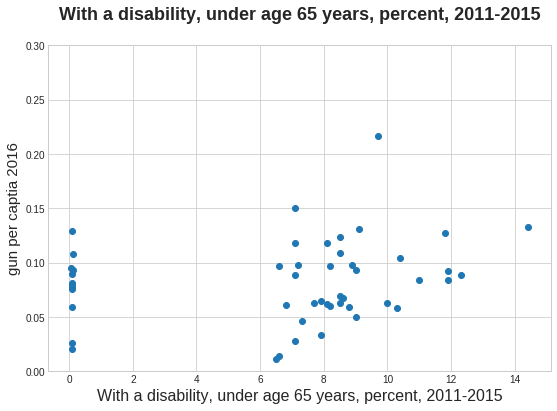

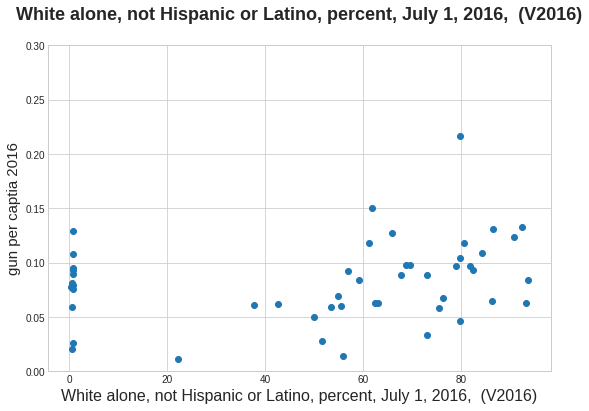

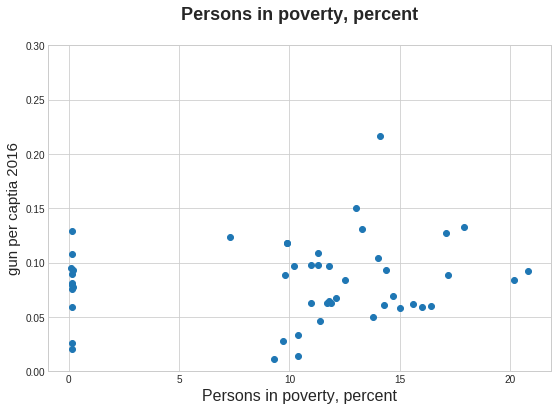

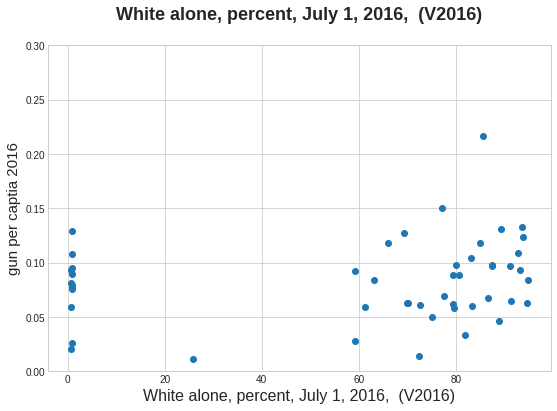

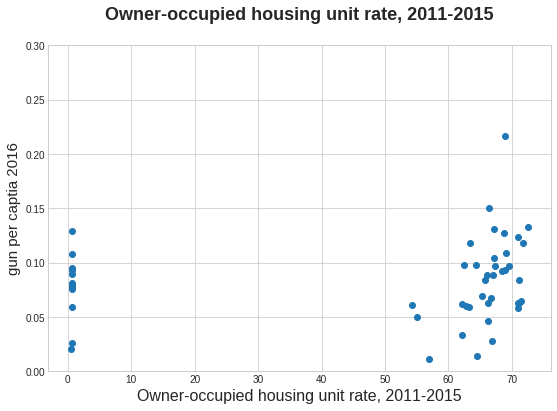

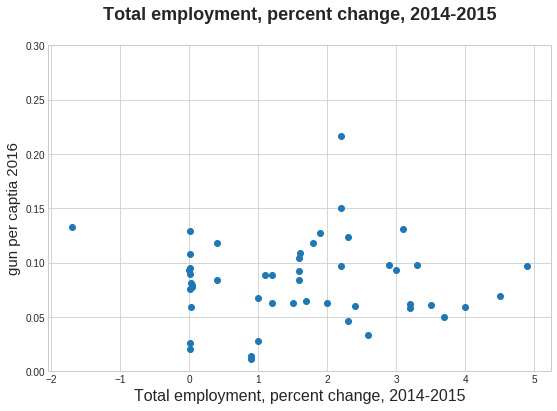

In [29]:
def scatter_multiple (df,x,y):
    '''A function to draw multiple scatter plots in the same figure,
    from a specefic dataframe column names
        Parameters :
        ** df (pandas.core.frame.DataFrame): dataframe whose columns we want to plot against one another in scatter plot
        ** x (list=[str1,str2]) :list of strings describing df column names,plots the column values on the x-axis in one subplot
        at a time,list can contain multiple values of column names,"must be a list even if it has 1 column name"
        ** y(str):1 column name only,this is the constant value that always appears on y-axis of any subplot
     '''
    y_axis=df[y]
    for col in x:
        x_axis=df[col]
        fig, ax = plt.subplots(figsize=(9,6))
        ax.scatter(x_axis,y_axis)
        #ignoring outliers to make graph more clear (this can be removed form the function if we want to plot different values
        #other than correlation coefficients)
        ax.set_ylim(0,0.3)
        ax.set_title(col+'\n',fontsize=18,fontweight="bold")
        ax.set_xlabel(col,fontsize=16)
        ax.set_ylabel(y,fontsize=15)
##function is ready, we can use it to plot the 10 required figures
#first let's plot the 5 positive values :

col_high_corr_pos=['With a disability, under age 65 years, percent, 2011-2015',            
'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',   
'Persons in poverty, percent',                                            
'White alone, percent, July 1, 2016,  (V2016)',                          
'Owner-occupied housing unit rate, 2011-2015',                           
'Total employment, percent change, 2014-2015']

scatter_multiple(df_gpcaptia,col_high_corr_pos,'gun per captia 2016')

### scatter plots for 5 highest negative Correlations

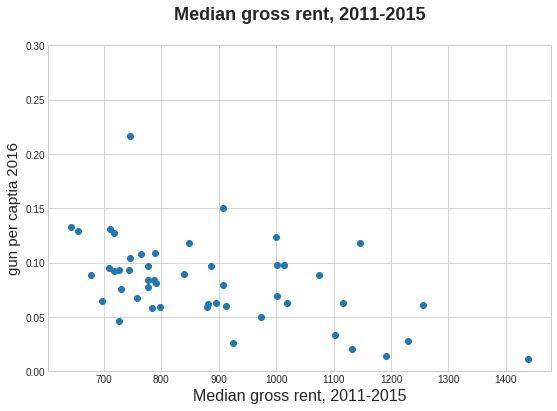

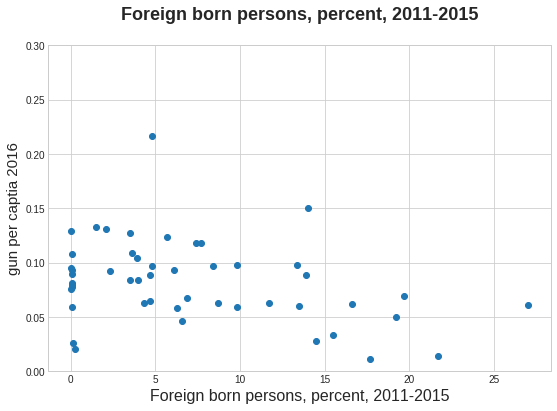

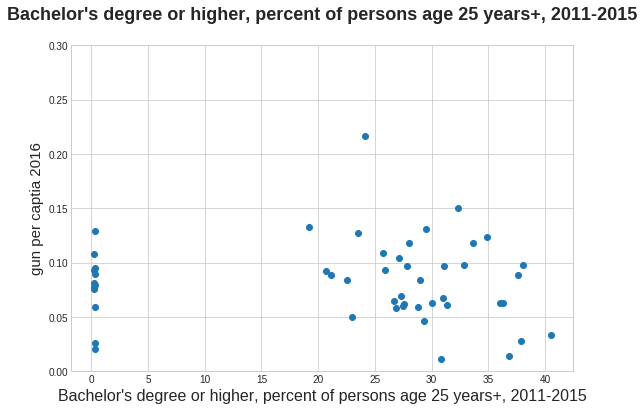

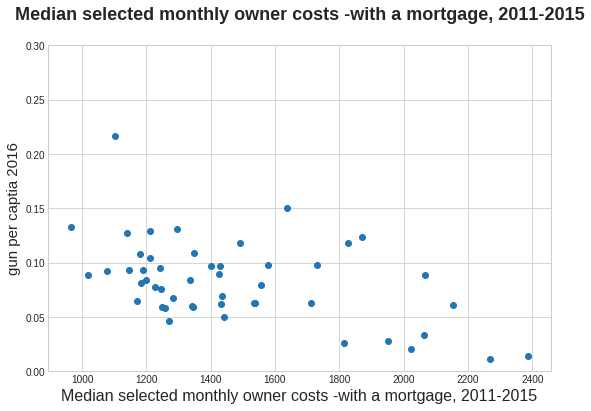

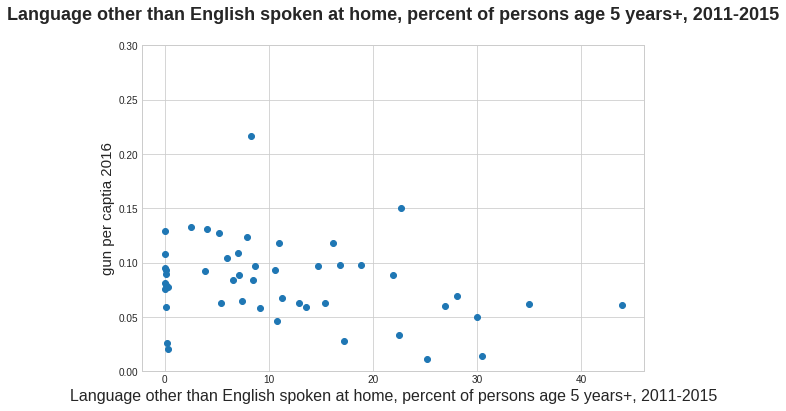

In [30]:
col_high_corr_neg=["Median gross rent, 2011-2015",
'Foreign born persons, percent, 2011-2015',
"Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
"Median selected monthly owner costs -with a mortgage, 2011-2015",
"Language other than English spoken at home, percent of persons age 5 years+, 2011-2015"]

#use the function created to plot the 5 negative values :
scatter_multiple(df_gpcaptia,col_high_corr_neg,'gun per captia 2016')


### Research Question 2  (what is the comparison between gun purchases & permits across states ? )

for this question,we are going to analyze the the total gun checks for the whole gun data for all years-
which is ranging from 1998 to 2017-and compare to the  percent of gun permits -% from total gun checks- across each state.  
then we can find out the highest states for total gun checks 'Purchases' and highest for permits

we only need the **month,sate,permit,totals** columns

In [31]:
df_g_2=df_g[['month', 'state', 'permit','totals']]
#2 dataframe for totals by state.
total_state=df_g_2.groupby('state')['totals'].sum()
permit_state=df_g_2.groupby('state')['permit'].sum()


now can have 2 plots to show :  
1.the comparison between total gun checks  
2.total permits percentage  
noting both totals are for the whole years from 1998 to 2017 for each state to get the biggest picture 

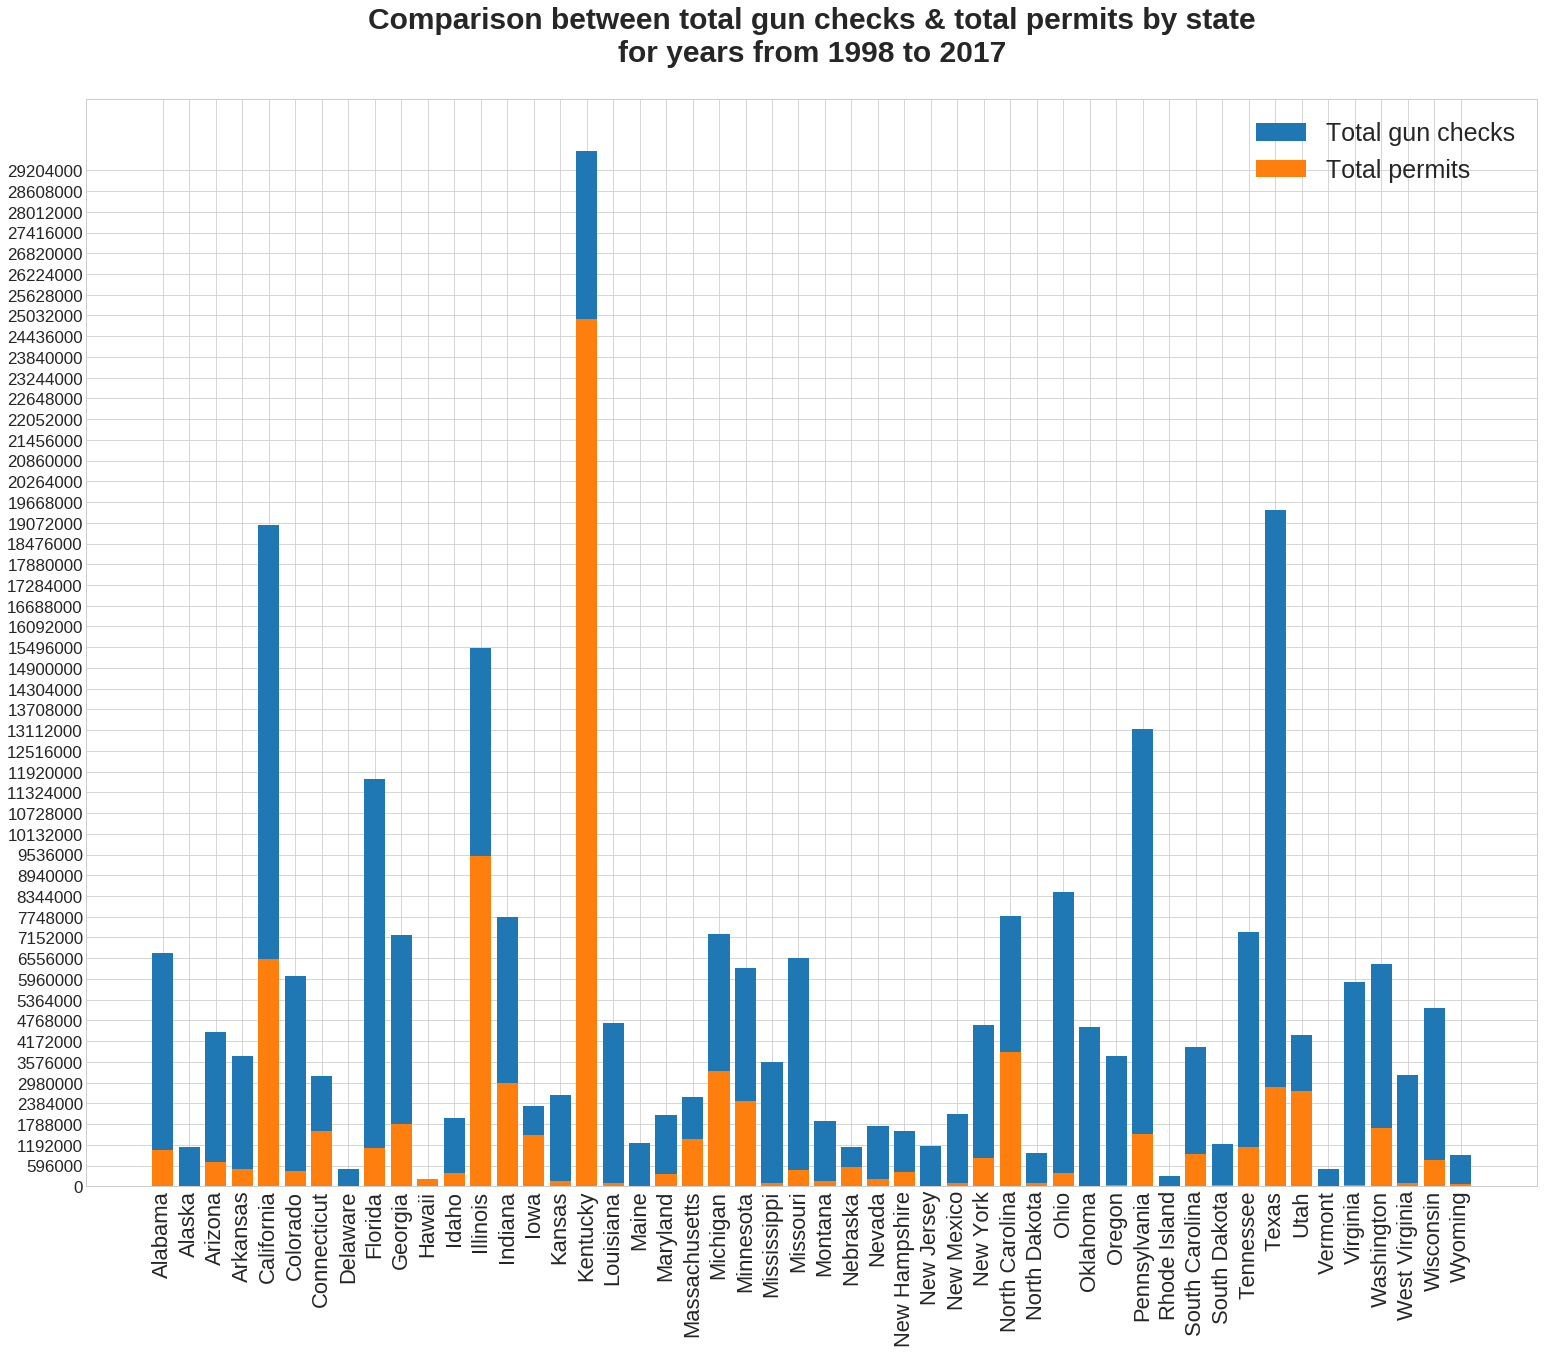

In [32]:
fig, ax = plt.subplots(figsize=(26,20))
ax.bar(total_state.index,height=total_state,label='Total gun checks')
ax.bar(total_state.index,height=permit_state,label='Total permits')
plt.title('Comparison between total gun checks & total permits by state\nfor years from 1998 to 2017'+'\n',size=30,fontweight='bold')
plt.xticks(size=22,rotation=90)
plt.yticks(np.arange(0,29800000,596000),size=17)
plt.ticklabel_format(style='plain',axis='y',useOffset=False)
ax.legend(fontsize=25);

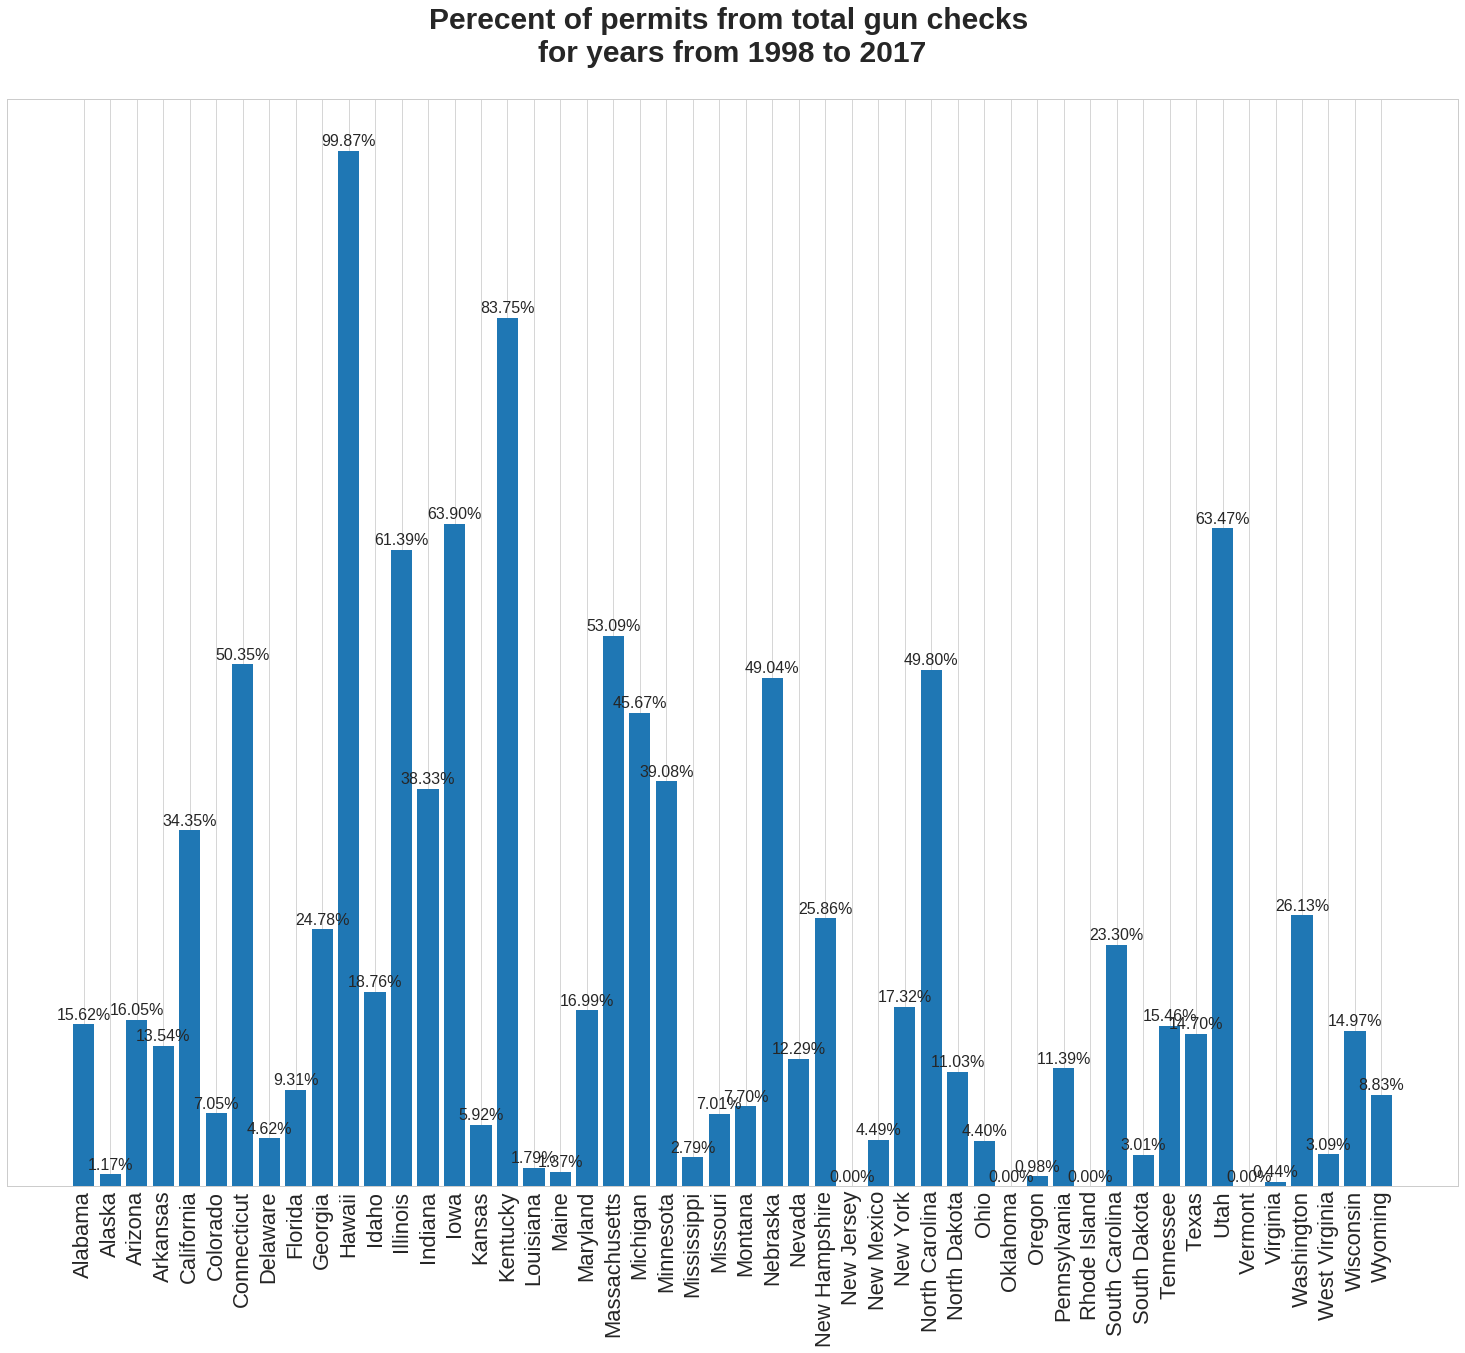

In [33]:
#this is permits % according to total gun checks,which we will plot
percent_permits=round(permit_state/total_state*100,2)
fig, ax = plt.subplots(figsize=(26,20))
plot=ax.bar(total_state.index,height=percent_permits)
plt.title('Perecent of permits from total gun checks \nfor years from 1998 to 2017'+'\n',size=30,fontweight='bold')
plt.xticks(size=22,rotation=90)
plt.yticks([])
for p in plot.patches:
    ax.annotate("%.2f" % p.get_height()+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10),textcoords='offset points',fontsize=16)
    

### from the above 2 figures together, we can get a direct comparison of the values across each state.

Now let's get the 5 highest states for:  
1.total gun checks  
2.permit percentage

In [34]:
gun_high=total_state.nlargest(5)
gun_high_p=percent_permits[gun_high.index]
print('\nHighest 5 states with total gun checks\n')
for i in range(0,5):
      print(str(i+1)+'.{}:\ntotal guns = {} , permits= {}%'.format(gun_high.index[i],gun_high[i],gun_high_p[i]))
print('_'*50)        
permit_high=percent_permits.nlargest(5)
permit_high_g=total_state[permit_high.index]
print('\nHighest 5 states with permit percentage\n')
for i in range(0,5):
      print(str(i+1)+'.{}:\ntotal guns = {} , permits= {}%'.format(permit_high.index[i],permit_high_g[i],permit_high[i]))


Highest 5 states with total gun checks

1.Kentucky:
total guns = 29762434 , permits= 83.75%
2.Texas:
total guns = 19435186 , permits= 14.7%
3.California:
total guns = 19014063 , permits= 34.35%
4.Illinois:
total guns = 15471534 , permits= 61.39%
5.Pennsylvania:
total guns = 13133876 , permits= 11.39%
__________________________________________________

Highest 5 states with permit percentage

1.Hawaii:
total guns = 197580 , permits= 99.87%
2.Kentucky:
total guns = 29762434 , permits= 83.75%
3.Iowa:
total guns = 2297156 , permits= 63.9%
4.Utah:
total guns = 4338273 , permits= 63.47%
5.Illinois:
total guns = 15471534 , permits= 61.39%


### Research Question 3 (Is there a trend for gun purchases over time?)

Here we are going to perform a time series analysis for the total gun checks,  
again assuming that it is an indication to  the total gun purchases,  
in order to get some insights through graphical representation & check for any trends or purchase patterns

we can use **df_g_2** created before in reasearch question 2 which contains total gun checks and years column

### First Plot : Total Gun Purchases by Years

In [35]:
#adding a year column,for time series analysis
df_g_2['year']=df_g_2['month'].dt.year
#gun data grouped by month
totals_years=df_g_2.groupby('year')['totals'].sum()

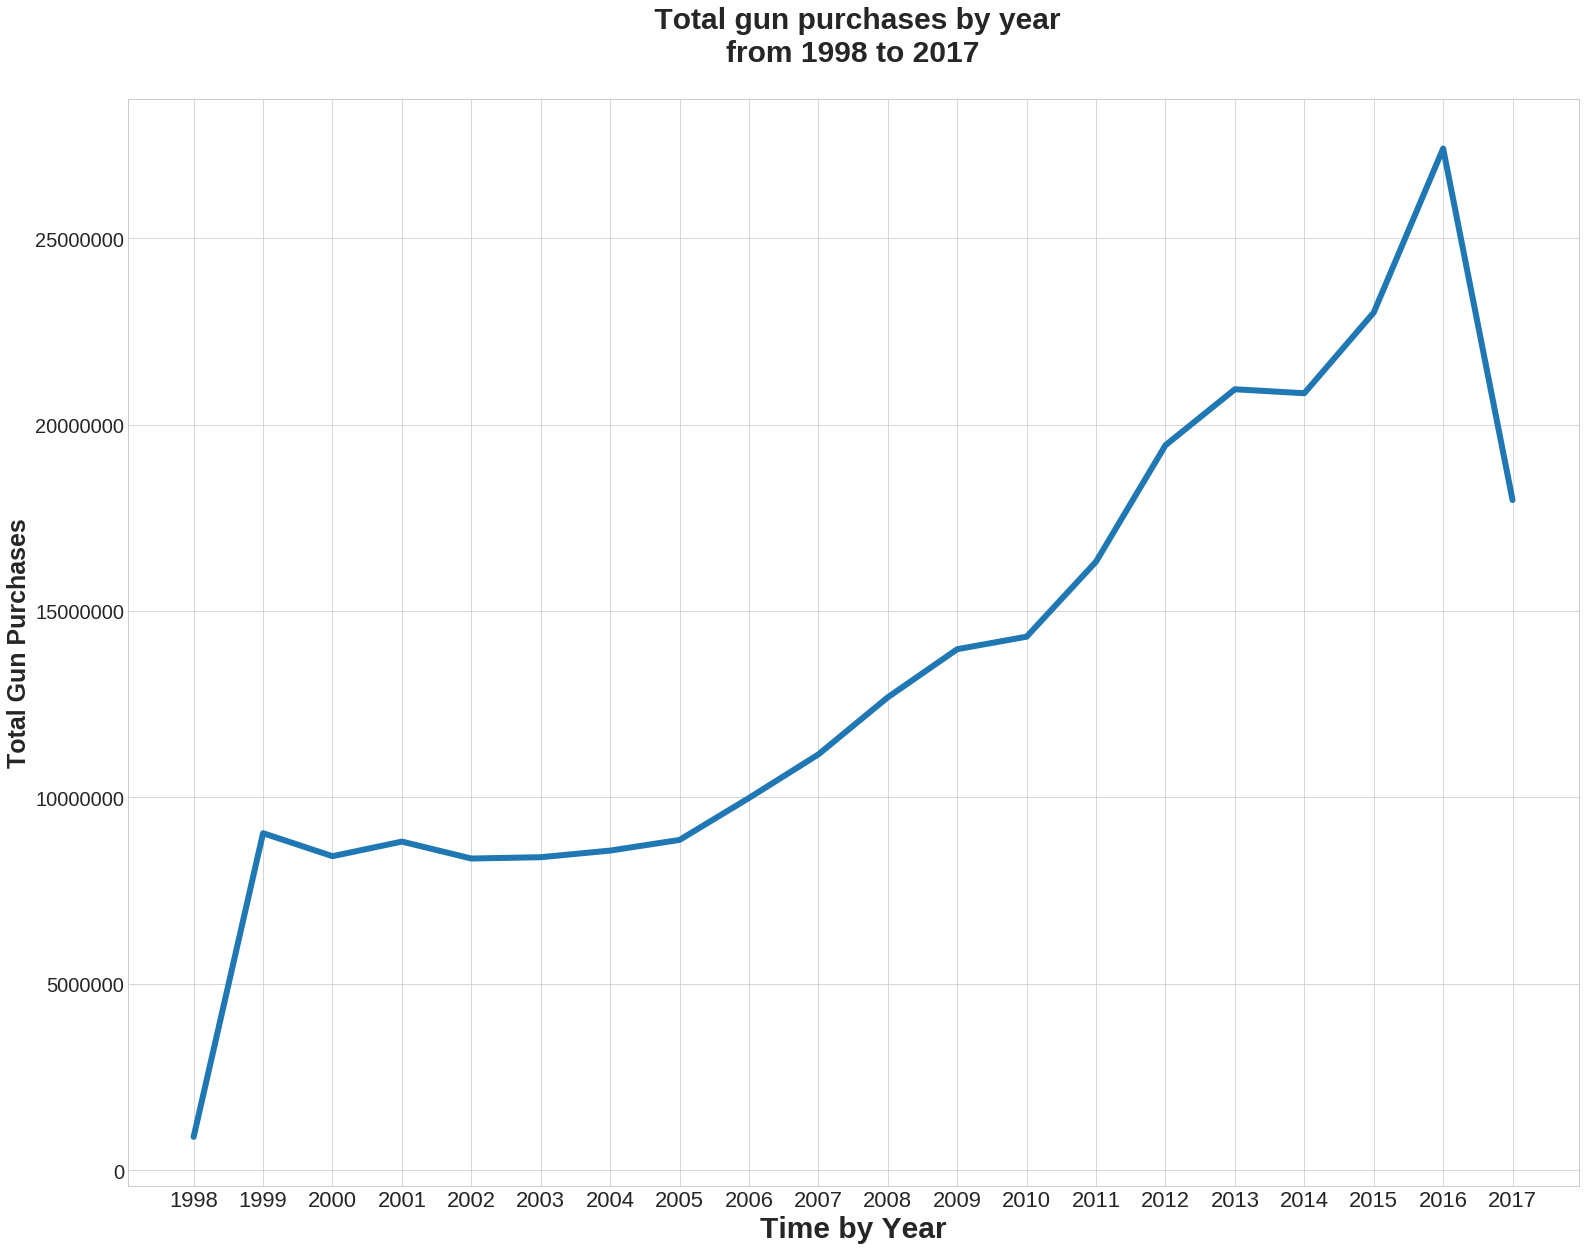

In [36]:
fig, ax = plt.subplots(figsize=(26,20))
ax.plot(totals_years,linewidth=6)
plt.title(' Total gun purchases by year\nfrom 1998 to 2017'+'\n',size=30,fontweight='bold');
plt.xticks(totals_years.index,size=22)
plt.yticks(size=20)
plt.xlabel('Time by Year',size=30,fontweight='bold')
plt.ylabel('Total Gun Purchases',size=25,fontweight='bold')
plt.ticklabel_format(style='plain',axis='y',useOffset=False);

## Observations 
### for the value of total gun purchases
1.We can see steady overall increase  across all years from 1999 to 2016,  
with the exception from 1999 to 2005  
2.We can disregard start and end years 1998 & 2017 in our analysis,as the month data provided is incomplete.  
3.From 1999 to 2005 ,the peak was at 1999,then slight increase and decrease going through till 2005,  
where the value was still lower than the 1999 value,where we can assume that the purchase rate is somewhat  steady with slight variations.  
4.then from 2005 to 2016,there was a huge consistent upward spike in gun purchases,only excecption is the very small decrease
from 2013 to 2014

### Second Plot : Total Gun Purchases by Month
for this plot,we are going to divide the years into 2 parts :__1999 to 2008 , 2008 to 2018__  
to have a clear visulation in the form of a line plot of each month.  
noting that for _years 1998 & 2018_ the total month are not complete '12 month' as rest of data.

In [37]:
#gun data grouped by month
total_month=df_g_2.groupby('month')['totals'].sum()
# index years 1999 to 2008
##total_month[2:110]
# index years 2008 to 2018
##total_month[110:]

Since we are going to make 2 similar plots with lots of modifications, let's create a function for the plot

In [38]:
# we used : "import matplotlib.dates as mdates" here to make x-axis show proper time,by month & date 
def time_analysis_plot(df,title,ylabel):
    '''A function to make a line plot for a time series analysis for a dataframe :
    parameters:
       df (pandas.core.series.Series):a series dataframe whose index is the time datetime format
       Title (str) : Title for the plot
       ylabel (str): label for the y-axis,for the variable being analyzed
    '''
       
    fig, ax = plt.subplots(figsize=(27,20))
    ax.plot(df,linewidth=2.5)
    plt.title(title+'\n',size=30,fontweight='bold')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.tick_params(axis="x", which="minor", rotation=90,size=10,labelsize=13.5)
    ax.tick_params(axis="x", which="major",labeltop=True,labelbottom=False) 
    ax.xaxis.grid(True,which='major', color='grey',linewidth=0.6)
    ax.xaxis.grid(True,which='minor', color='grey', linewidth=0.4)
    plt.xlabel('Time by Month',size=30,fontweight='bold')
    plt.ylabel(ylabel,size=25,fontweight='bold')
    plt.xticks(size=22)
    plt.yticks(size=17);

Now we can apply the function twice :
### First plot :
Years 1999 to 2008

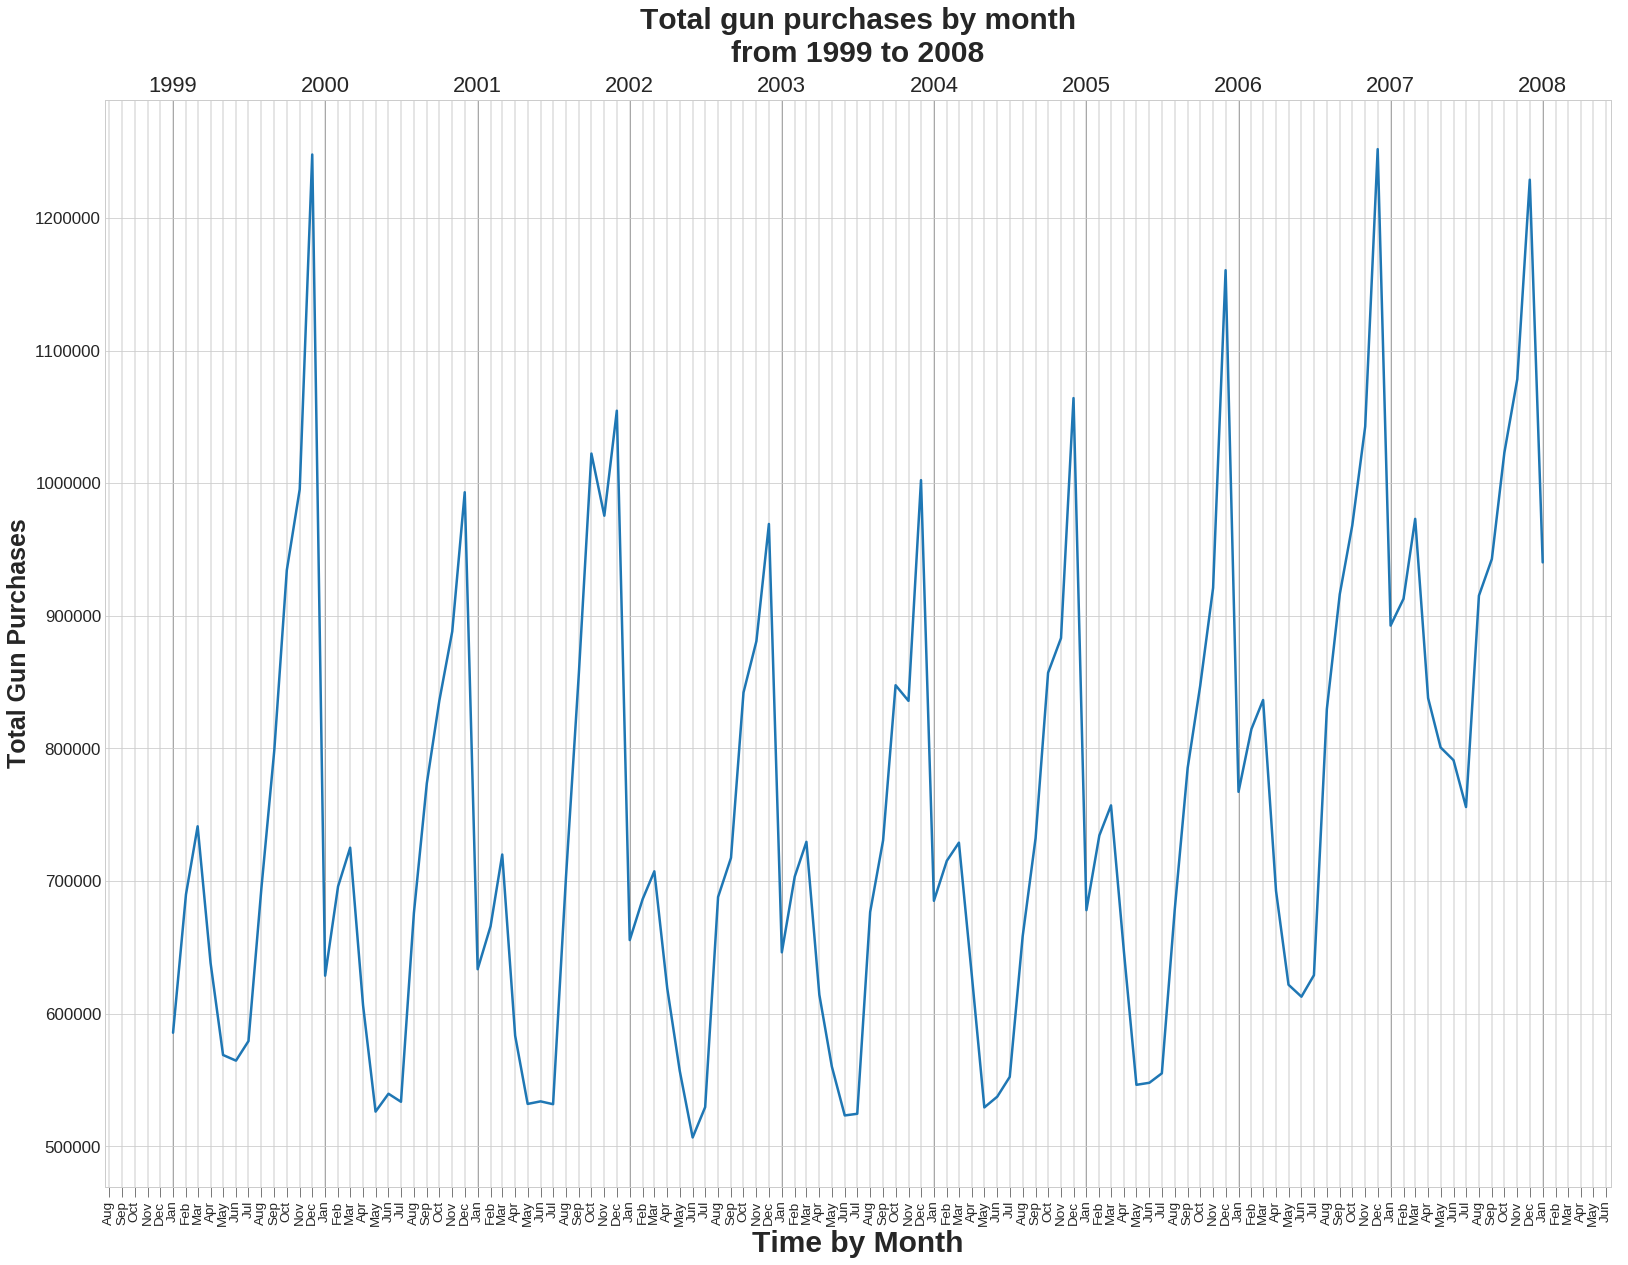

In [39]:
time_analysis_plot(total_month[2:111],'Total gun purchases by month\nfrom 1999 to 2008','Total Gun Purchases')

### Second  plot :
Years 2008 to 2018

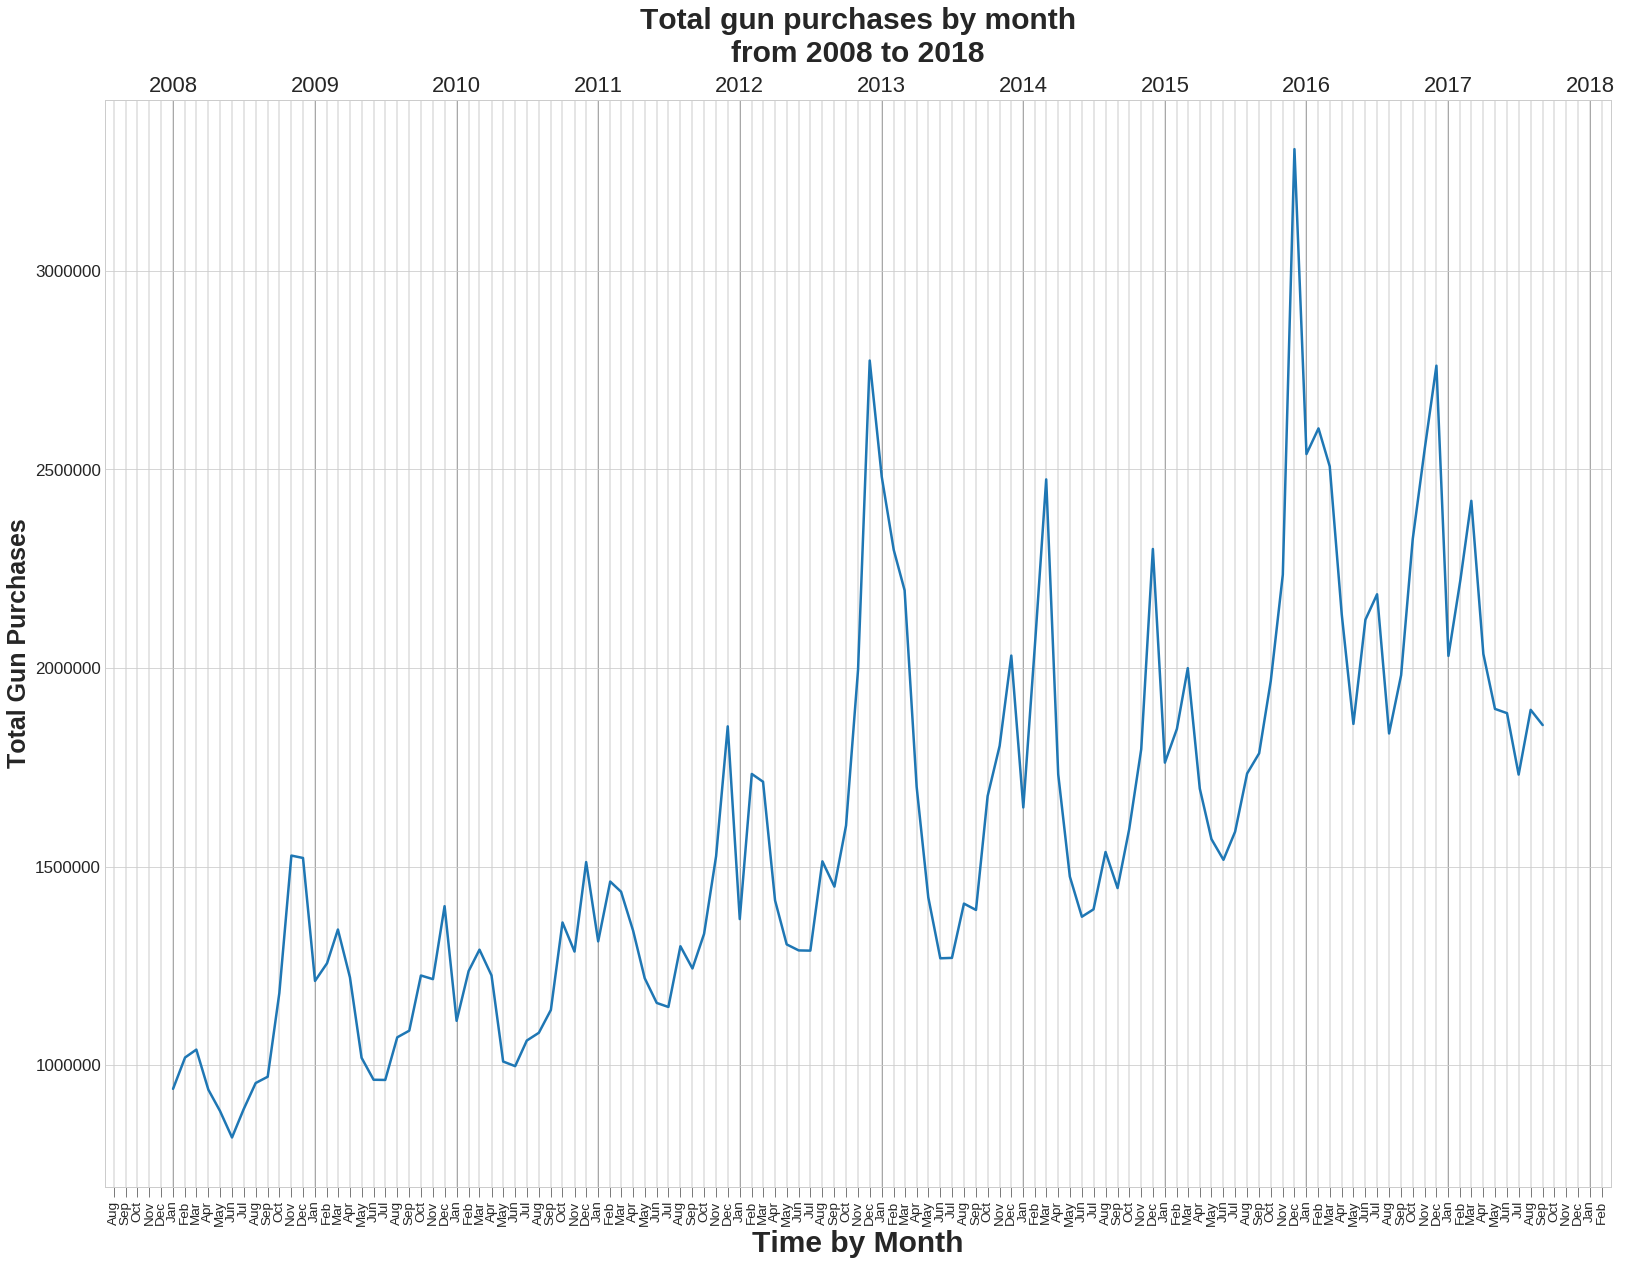

In [40]:
time_analysis_plot(total_month[110:],'Total gun purchases by month\nfrom 2008 to 2018','Total Gun Purchases')

## Observations 
### for month data, looking for patterns across years for the value of total gun purchases
The shape of the line plot is mostly similar,with the below characteristics:  
noting that some years might not follow this exact pattern, but is usually very highly similar for most of the years,
which concludes a trend:  
1.The peak value occurs in december.  
2.Then followed by a decrease in january,but it is not the lowest point.  
3.Then Following february & march,there is a small linear increase  
4.Then there is most notabely a decrease going through from march to july,although here
the decrease can vary  
wether linear or slight variatios of increasing and decreasing,  but the lowest point usually occurs in july  
5.Then mostly there is a linear increase starting from august untill we reach our peak value in december.

<a id='conclusions'></a>
## Conclusions

### Research Question 1 : "What census data is most associated with high gun per capita?"
>We calculated the **Pearson's Correlation Coefficient** ([refrence Link:correlation coefficent](https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall))for all census fact data,  
to determine the most associated (positive and negative) with gun per captia for year 2016 & the magnitude.  
For refrence,in the analysis section there will be 5 scatter plots each for highest positive and negative correlations  
Below are the top 3 for each:listed as **Census Data: Pearson's Correlation Coefficient** 

>>**positive correlations**:  
- With a disability, under age 65 years, percent, 2011-2015             :   0.2611  
- Persons in poverty, percent                                              :   0.2263  
- White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)     :   0.2190

>>**negative correlations**:  
- Median gross rent, 2011-2015                                             :   -0.3229  
- Median selected monthly owner costs -with a mortgage, 2011-2015          :   -0.3007  
- Median value of owner-occupied housing units, 2011-2015                  :   -0.2706  
### Conclusions:
- First we need to note that correlation is not the same as causation,  
correlation(association)means changing a variable (census data) affects the other variable (gun per captia)  
wether positively (increase) or negatively (decrease),but is not the main reason of the change.
- The value of the highest correlation Coefficient are near or less than 0.3,which is a **weak correlation**,  
reset of the values are somewhat neglegible and very weak
- Finally, the most associated census data with gun per captia :  
**With a disability, under age 65 years, percent, 2011-2015 (Positive) & Median gross rent, 2011-2015 (negative)**

### Research Question 2 : "What is the comparison between gun purchases & permits across states?"
>This question is better answered visually with the 2 bar graphs created for the gun purchases & permits percentage for each state.
But computing the highest values can give intersting insights:
>>Highest 5 states with total gun checks
1. Kentucky:
total guns = 29762434 , permits= 83.75%
2.  Texas:
total guns = 19435186 , permits= 14.7%
3.  California:
total guns = 19014063 , permits= 34.35%
4. Illinois:
total guns = 15471534 , permits= 61.39%
5. Pennsylvania:
total guns = 13133876 , permits= 11.39%

>>Highest 5 states with permit percentage
1. Hawaii:
total guns = 197580 , permits= 99.87%
2. Kentucky:
total guns = 29762434 , permits= 83.75%
3. Iowa:
total guns = 2297156 , permits= 63.9%
4. Utah:
total guns = 4338273 , permits= 63.47%
5. Illinois:
total guns = 15471534 , permits= 61.39%  

We can refer to this [Link:](https://www.usconcealedcarry.com/resources/ccw_reciprocity_map/ky-gun-laws/) for an overview on gun laws for each state
### Conclusions
- **Kentucky** has the highest activity for gun checks "Purchases" acroess all states with a massive difference,  
but has the **2nd highest permit %**,although it is not required by law to obtain a permit for the sale.
- unlike **hawaii**,which has the **1st highest permit %**,as the law requires a permit for the sale.
- **Texas** on the other hand with 2nd highest gun checks "Purchases" activity,has the same leniency in gun laws as kentucky,  
but a very low permit %.This is an intersting insight which can be looked into further to determine the reason.

### Research Question 3 : "Is there a trend for gun purchases over time?"

## Conclusions :
These were directly concluded from both time series analysis plots by years and months.
#### From years plot :
1. There has been steady increase in the total gun checks each year,specified in next points.
2. From Years 1999 to 2005 the total gun purchases (total of all 50 states) was consistent around the same value roughly below 10 million.  
3. from 2005 to 2016, there was a massve spike in the total gun purchase value,  
mostly a linear increase where it's peak
was at 2016 with it's value roughly slight below 30 million.  

#### From month plot :
**We can conclude a seasonal pattern for gun purchases as follows**  
1. upward trend in the gun purchases starting from the end of summer in august, steadily increasing through the fall  
then winter, where the peak value always occurs at december  
2. Through winter in january,the value drops significantly in comparison to december,but then increases again in february
3. Through the spring all the way to july,the gun purchases trend mostly decrease,and here we will find  
the lowest values, which most usually occurs in july,before it starts dcreasing again in august as mentioned beore.

## Observations 
### for month data, looking for patterns across years for the value of total gun purchases
The shape of the line plot is mostly similar,with the below characteristics:  
noting that some years might not follow this exact pattern, but is usually very highly similar for most of the years,
which concludes a trend:  
1.The peak value occurs in december.  
2.Then followed by a decrease in january,but it is not the lowest point.  
3.Then Following february & march,there is a small linear increase  
4.Then there is most notabely a decrease going through from march to july,although here
the decrease can vary  
wether linear or slight variatios of increasing and decreasing,  but the lowest point usually occurs in july  
5.Then mostly there is a linear increase starting from august untill we reach our peak value in december.

## Limitations
> 1. The Total gun checks variable which we use for most of our statistics,   
is directly assumed to be total gun purchases,
although it can be a good indicator,  
it can't be directly a 1 to 1 correlation a huge ammount gun purchases does not include a background check on NICS
2. **gun per captia** variable is only computed for year *2016* not *2010* and used to check the association with census data,  due to that most census data facts occurs after 2010.the 2010 variable is calculated,but can't be used to determine association
as it will give false results
3. for the time series analysis , years 1998 and 2017 are disregarded, as the month data for both years are incompelte
and not provided in the original dataset.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0